<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
ВЛАДИМИР, рад приветствовать ВАС! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху Ваших знаний - свой опыт, что бы Вы могли использовать его для Вашего дальнейшего успеха)
<br>
</font>
<br>

</font>

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

### Инструкция по выполнению проекта

1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные.
3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.

### Описание данных

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце '*num_orders*' (от англ. *number of orders*, «число заказов»).

# 1. Подготовка

Загрузим данные, ознакомимся с содержанием:

In [1]:
import pandas as pd
taxi = pd.read_csv('//datasets/taxi.csv',)
print(taxi.info())
print(taxi.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None
              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32


In [2]:
taxi = pd.read_csv('//datasets/taxi.csv', index_col=[0], parse_dates=[0])
print(taxi.head())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


Для временных рядов важно, чтобы они были монотонными. Проверим.

In [3]:
print(taxi.index.is_monotonic)

True


Данные монотонны, предобработки не треубется. Посмотрим, какой временной диапазон охватывает данные.

In [4]:
print(taxi.index.max())
print(taxi.index.min())

2018-08-31 23:50:00
2018-03-01 00:00:00


Данные за период март-август 2018 г. Т.к. горизонт прогнозирования по условиям заказчика - 1 час, то выполним ресемплирование и рассчитаем среднее

In [5]:
taxi = taxi.resample('1H').sum()

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='red'>
ок, есть ресемплирование. Только лучше sum() - это будет метрика: количество за час. А если mean - среднее количество за 10 минут в одном часе.....

# 2. Анализ

Проанализируем данные на графике

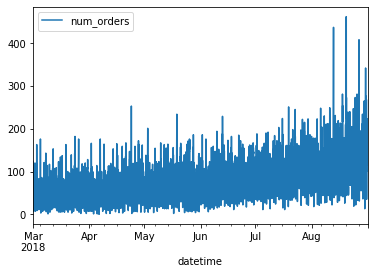

In [6]:
taxi.plot()

Виден восходящий тренд, но не понятно, это тренд в связи с ростом компании или это сезонность в рамках года. Увеличим масшатб, проанализируем только март.

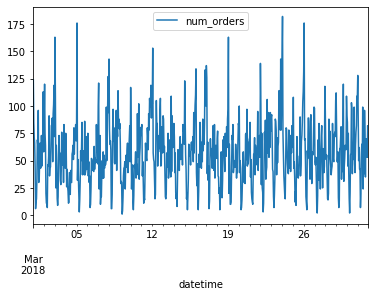

In [7]:
taxi['2018-03-01':'2018-03-31'].plot()

По графику видно, что паттерн кол-ва заказов повторяется каждый день. Мы видим выбросы 5, 12 и 19го числа.

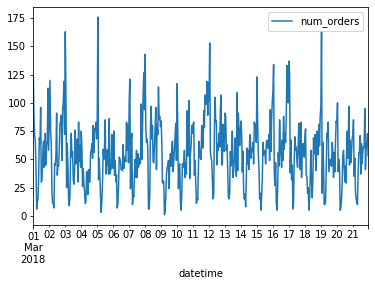

In [8]:
taxi['2018-03-01':'2018-03-21'].plot()

Мы видим, что эти выбросы приходятся на понедельники. Проанализируем обычный день и понедельник 19го

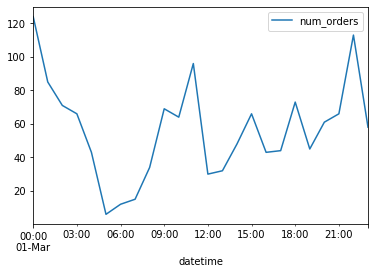

In [9]:
taxi['2018-03-01':'2018-03-01'].plot()

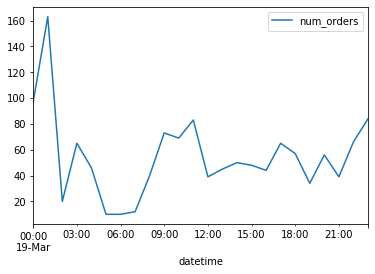

In [10]:
taxi['2018-03-19':'2018-03-19'].plot()

Мы видим, что всплеск приходится на 01:00 Пн. Это объяснимо, т.к. люди когда планируют свой отпуск, захватывают и Вс, и хотят провести как можно больше в отпуске. Соответственно, прилитают они поздно, и в Пн им на работу, соответственно, нужно максимально быстро попасть из аэропорта домой. Такси наиболее подходящий вариант.

Подвердим свое предположение о сезонности с помощью инструментов python.

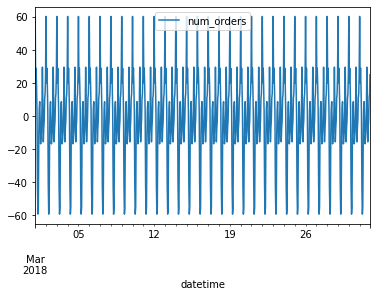

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(taxi)

decomposed.seasonal['2018-03-01':'2018-03-31'].plot()

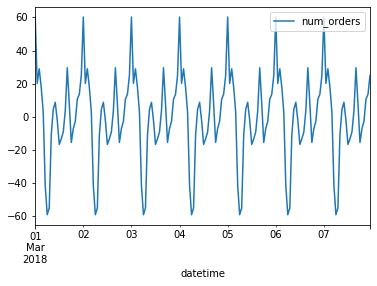

In [12]:
decomposed.seasonal['2018-03-01':'2018-03-07'].plot()

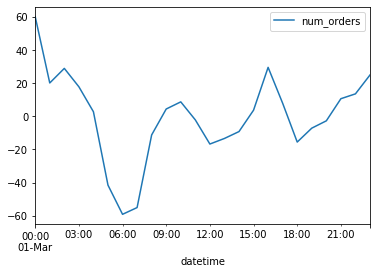

In [13]:
decomposed.seasonal['2018-03-01':'2018-03-01'].plot()

Действительно, сезонность наблюдается в рамках одних суток - мало заказов ночью, много утром и вечером.

Подтвердим предположение о восходящем тренде.

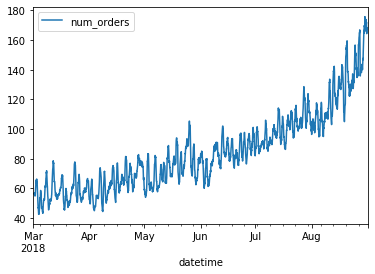

In [14]:
decomposed.trend.plot()

В информативных целях выведем остаток декомпозиции.

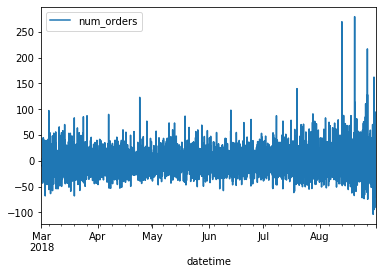

In [15]:
decomposed.resid.plot()

Проанализируем данные с помощью скользящего среднего. Т.к. мы увидели, что сезонность у нас в рамках одних суток, то установим размер окна 24 часа.

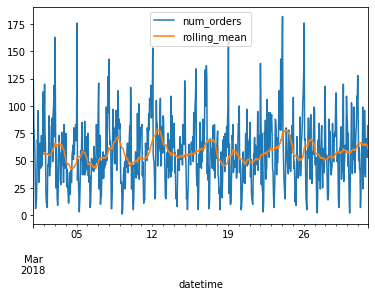

In [16]:
taxi['rolling_mean'] = taxi.rolling(24).mean()# < напишите код здесь >
taxi['2018-03-01':'2018-03-31'].plot()

Из этого графика видно, что такси заказывают меньше в выходные дни, что логично, т.к. большинство людей предпочитает задействовать выходные для отпуска.

Из проведенного анализа видно, что в качество признаков для прогнозирования нам важны:
- месяц и число (т.к. у нас общий восходящий тренд);
- время суток, час (т.к.  сезонность наблюдается в рамках одних суток);
- день недели (т.к. в выходные меньше заказов, в Пн в 01:00 всплеск)

Также добавим отставание на 5 часов, что будет показаывать будет ли убывать или возрастать кол-во заказов

Также добавим скользящее среднее за 24 часа, т.к у нас сезонность в рамках суток 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Отличное исследование - принимется, хорошо, что глянули график на коротком периоде<br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - очень нужный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это очень помогает сделать предвариетльные выводы<br>
Вы здорово резюмировали свои наблюдения<br>
    
И я тоже позволю ответку по выводам)))<br>
D реальности есть все три вида сезонности:<br>
1)дневная сезонность есть - ведь данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2)Но ведь есть ещё внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером (об этом Вы сказали) <br>
3)Ну и наконец есть месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных (и Вы об этом пишите) восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то одной сезонности может и хватить.
</font>

Напишем формулу, которая создаст все необходимы признаки

In [17]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ну вот здесь Вы вводите день, месяц. В общем-то, это поможет справитьс с проблематикой 3-х видов сезонности в данных<br>
Ввели лаги...ок, здорово.<br>
    
Ещё на заметку: month - здесь уместен, но помочь сильно не сможет. Т.к. данных меньше года(((((<br>
    
Лаги - тут исключительно методом подбора..<br>
Лучше, конечно, "далеко не убегать". 2, 3 - если дальше, то чисто для бизнеса тяжело это будет понять: продажи 10 дней назад (если лаг=10) влияют на сегодняшние продажи..
</font>

In [18]:
make_features(taxi, 5, 24)

In [19]:
print(taxi)

                     num_orders  rolling_mean  month  day  dayofweek  hour  \
datetime                                                                     
2018-03-01 00:00:00         124           NaN      3    1          3     0   
2018-03-01 01:00:00          85           NaN      3    1          3     1   
2018-03-01 02:00:00          71           NaN      3    1          3     2   
2018-03-01 03:00:00          66           NaN      3    1          3     3   
2018-03-01 04:00:00          43           NaN      3    1          3     4   
...                         ...           ...    ...  ...        ...   ...   
2018-08-31 19:00:00         136    164.875000      8   31          4    19   
2018-08-31 20:00:00         154    167.541667      8   31          4    20   
2018-08-31 21:00:00         159    168.041667      8   31          4    21   
2018-08-31 22:00:00         223    166.416667      8   31          4    22   
2018-08-31 23:00:00         205    169.125000      8   31       

Разделим ГС на обучающую, валидационную и тестовую выборки (размеры выборок 0.8, 0.1 и 0.1 соответственно)

In [20]:
from sklearn.model_selection import train_test_split

train, valid_test = train_test_split(taxi, shuffle=False, test_size=0.2)
print(valid_test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884 entries, 2018-07-26 04:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 11 columns):
num_orders      884 non-null int64
rolling_mean    884 non-null float64
month           884 non-null int64
day             884 non-null int64
dayofweek       884 non-null int64
hour            884 non-null int64
lag_1           884 non-null float64
lag_2           884 non-null float64
lag_3           884 non-null float64
lag_4           884 non-null float64
lag_5           884 non-null float64
dtypes: float64(6), int64(5)
memory usage: 82.9 KB
None


In [21]:
valid, test = train_test_split(valid_test, shuffle=False, test_size=0.5)
print(valid.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 442 entries, 2018-07-26 04:00:00 to 2018-08-13 13:00:00
Freq: H
Data columns (total 11 columns):
num_orders      442 non-null int64
rolling_mean    442 non-null float64
month           442 non-null int64
day             442 non-null int64
dayofweek       442 non-null int64
hour            442 non-null int64
lag_1           442 non-null float64
lag_2           442 non-null float64
lag_3           442 non-null float64
lag_4           442 non-null float64
lag_5           442 non-null float64
dtypes: float64(6), int64(5)
memory usage: 41.4 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 442 entries, 2018-08-13 14:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 11 columns):
num_orders      442 non-null int64
rolling_mean    442 non-null float64
month           442 non-null int64
day             442 non-null int64
dayofweek       442 non-null int64
hour            442 non-null int64
lag_1           442 non-null float6

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
да 3 выборки, это по проекту надо)

Удалим пропущенные значения в трейне (т.к. мы выводили скользящее среднее и отстающие значения)

In [22]:
train = train.dropna()

Выделим признаки и целевой признак:

In [23]:
train_features = train.drop(columns=['num_orders'])
train_target = train['num_orders']

valid_features = valid.drop(columns=['num_orders'])
valid_target = valid['num_orders']

test_features = test.drop(columns=['num_orders'])
test_target = test['num_orders']

Отмасштабируем признаки

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
valid_features = scaler.transform(valid_features)
test_features = scaler.transform(test_features)

# 3. Обучение

Проанализируем модели градиентного бустинга CatBoost, LightGBM и линейную регрессию. Начнем с catboost

In [25]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
state=12345

Проитерируем максимльную глубину и количество деревьев. Начнем с глубины при количестве деревьев 5. Глубина бует варьироваться в диапазоне от 1 до 10.

In [26]:
rmse_best = 10000
#estim_best = 0
depth_best = 0

for depth in range(1, 11):
    model = CatBoostRegressor(random_state = state, max_depth = depth, n_estimators = 5, verbose=0)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    rmse = mean_squared_error(prediction, valid_target)**0.5
    print('RMSE test: {:.2f}'.format(rmse))
    if rmse<rmse_best:
        rmse_best=rmse
        #estim_best=estim
        depth_best=depth

print('')
print('Наименьший rmse = {:.2f} при значении n_estimators = {} и max_depth = {}'.format(rmse_best, 5, depth_best))

RMSE test: 57.02
RMSE test: 56.67
RMSE test: 56.14
RMSE test: 55.52
RMSE test: 55.45
RMSE test: 55.09
RMSE test: 55.28
RMSE test: 55.08
RMSE test: 55.22
RMSE test: 55.05

Наименьший rmse = 55.05 при значении n_estimators = 5 и max_depth = 10


При наилучшей глубине 5 проитерирую кол-во деревьев в диапазоне от 10 до 100 с шагом 10.

In [27]:
rmse_best = 10000
estim_best = 0
#depth_best = 0

for estim in range (10, 101, 10):
    model = CatBoostRegressor(random_state = state, max_depth = 10, n_estimators = estim, verbose=0)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    rmse = mean_squared_error(prediction, valid_target)**0.5
    print('RMSE test: {:.2f}'.format(rmse))
    if rmse<rmse_best:
        rmse_best=rmse
        estim_best=estim
        #depth_best=depth

print('')
print('Наименьший rmse = {:.2f} при значении n_estimators = {} и max_depth = {}'.format(rmse_best, estim_best, 10))

RMSE test: 52.52
RMSE test: 48.31
RMSE test: 45.22
RMSE test: 43.06
RMSE test: 41.32
RMSE test: 39.92
RMSE test: 38.91
RMSE test: 38.04
RMSE test: 37.41
RMSE test: 36.88

Наименьший rmse = 36.88 при значении n_estimators = 100 и max_depth = 10


Проанализируем модель LGBMRegressor

Проитерируем максимлаьную глубину и количество деревьев. Ннем с глубины при количестве деревьев 5. Глубина бует варьироваться в диапазоне от 1 до 10.

In [28]:
from lightgbm import LGBMRegressor

rmse_best = 10000
#estim_best = 0
depth_best = 0

for depth in range(1, 11):
    model = LGBMRegressor(random_state = state, max_depth = depth, n_estimators = 5, verbose=0)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    rmse = mean_squared_error(prediction, valid_target)**0.5
    print('RMSE test: {:.2f}'.format(rmse))
    if rmse<rmse_best:
        rmse_best=rmse
        #estim_best=estim
        depth_best=depth

print('')
print('Наименьший rmse = {:.2f} при значении n_estimators = {} и max_depth = {}'.format(rmse_best, 5, depth_best))

RMSE test: 54.84
RMSE test: 53.08
RMSE test: 51.07
RMSE test: 49.89
RMSE test: 47.99
RMSE test: 47.19
RMSE test: 46.95
RMSE test: 46.79
RMSE test: 46.69
RMSE test: 46.87

Наименьший rmse = 46.69 при значении n_estimators = 5 и max_depth = 9


При наилучшей глубине 9 проитерирую кол-во деревьев в диапазоне от 10 до 100 с шагом 10.

In [29]:
from lightgbm import LGBMRegressor

rmse_best = 10000
estim_best = 0
#depth_best = 0

for estim in range (10, 101, 10):
    model = LGBMRegressor(random_state = state, max_depth = 9, n_estimators = estim, verbose=0)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    rmse = mean_squared_error(prediction, valid_target)**0.5
    print('RMSE test: {:.2f}'.format(rmse))
    if rmse<rmse_best:
        rmse_best=rmse
        estim_best=estim
        #depth_best=depth

print('')
print('Наименьший rmse = {:.2f} при значении n_estimators = {} и max_depth = {}'.format(rmse_best, estim_best, 9))

RMSE test: 40.59
RMSE test: 35.14
RMSE test: 33.26
RMSE test: 32.44
RMSE test: 32.15
RMSE test: 31.79
RMSE test: 31.64
RMSE test: 31.62
RMSE test: 31.62
RMSE test: 31.70

Наименьший rmse = 31.62 при значении n_estimators = 90 и max_depth = 9


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
%%time
model = LinearRegression()
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
rmse = mean_squared_error(prediction, valid_target)**0.5
print('RMSE test: {:.2f}'.format(rmse))

RMSE test: 40.46
CPU times: user 9.5 ms, sys: 466 µs, total: 9.96 ms
Wall time: 4.48 ms


# 4. Тестирование

Сравним лучшие моделим на тестовой выборке 

Начнем с CatBoostRegressor, но предварительно объединим тестовую и валидационную выборку, т.к. прогноз должен строиться на максимально свежих данных.

In [32]:
import numpy as np
train_features_concat = np.concatenate([train_features, valid_features])
train_target_concat = np.concatenate([train_target, valid_target])


CatBoostRegressor

In [33]:
%%time
model = CatBoostRegressor(random_state = state, max_depth = 10, n_estimators = 100, verbose=0)
model.fit(train_features_concat, train_target_concat)
prediction = model.predict(test_features)
rmse = mean_squared_error(prediction, test_target)**0.5
print('RMSE test: {:.2f}'.format(rmse))

RMSE test: 54.72
CPU times: user 5.59 s, sys: 659 ms, total: 6.25 s
Wall time: 9.26 s


LGBMRegressor

In [34]:
%%time
model = LGBMRegressor(random_state = state, max_depth = 9, n_estimators = 90, verbose=0)
model.fit(train_features_concat, train_target_concat)
prediction = model.predict(test_features)
rmse = mean_squared_error(prediction, test_target)**0.5
print('RMSE test: {:.2f}'.format(rmse))

RMSE test: 44.15
CPU times: user 1.05 s, sys: 27.8 ms, total: 1.07 s
Wall time: 1.04 s


LinearRegression

In [35]:
%%time
model = LinearRegression()
model.fit(train_features_concat, train_target_concat)
prediction = model.predict(test_features)
rmse = mean_squared_error(prediction, test_target)**0.5
print('RMSE test: {:.2f}'.format(rmse))

RMSE test: 51.19
CPU times: user 9.09 ms, sys: 403 µs, total: 9.49 ms
Wall time: 4.44 ms


Единственная модель, продемонстрировшая требуемый показатель точность, это LGBMRegressor. При этом он демонстрирует неплохое быстродействие (работает в 9 раз быстрее по сравнению с CatBoost).

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
</font>
<font color='green'>
ВЛАДИМИР, спасибо, что откликнулись на мои комментарии.<br>
Теперь проект до конца логичный)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ВЛАДИМИР, не смотря на красный шрифт, работа очень добротная!<br>
Идейно, Вы в том направлении делали шаги.<br>
Хорошо поработали с подбором моделей и их параметров.<br>
Мне понравились Ваши размышления по сезонности, и вообще подход к работе<br>
   
но закрался один моментов который надо скорретировать всё-таки)))<br>
 <font color='red'>   
1) ресемплирование нужно с суммой<br>

 <font color='green'>   
Спасибо)<br>
БУДУ ЖДАТЬ ВАШИХ КОММЕНТАРИЕВ!

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Хотел бы оставить несколько идей для Ваших будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.


# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48